# ML methods, week 12 demo

## Libraries and settings

In [161]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

### Target variable numerical (house price) or categorical (diabetes)

## Housing data

In [84]:
# Corrected Boston Housing data by Bivand, Nowosad and Lovelace
# https://jakubnowosad.com/spData/reference/boston.html
dfo = pd.read_csv("boston_corrected.tsv", sep='\t', skiprows=9)

In [85]:
dfo.head(2)

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


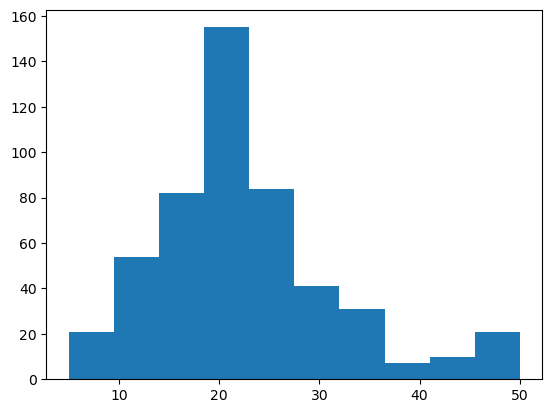

In [157]:
plt.hist(dfo.CMEDV)
plt.show()

In [158]:
from scipy.stats.mstats import normaltest
normaltest(dfo.CMEDV.values)
# is not a Normal distribution

NormaltestResult(statistic=91.57490454794716, pvalue=1.3024532297084256e-20)

In [86]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [262]:
df = dfo.drop(['OBS.', 'LON', 'LAT', 'TRACT', 'TOWN', 'TOWN#', 'MEDV'], axis=1, inplace=False)

In [88]:
df.corr()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676


<Axes: >

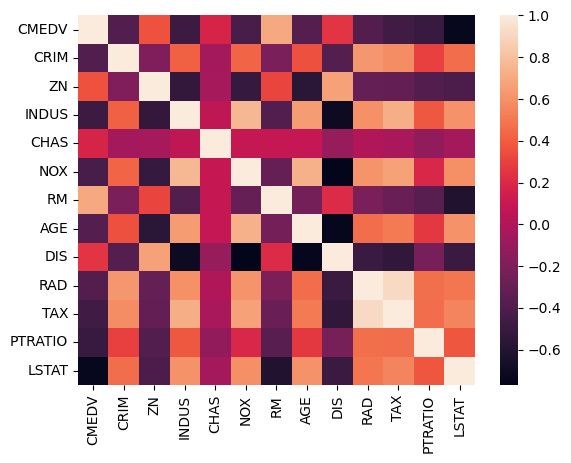

In [91]:
sns.heatmap(df.corr(), annot=False)

In [263]:
# CMEDV = corrected median house value
y = df.CMEDV
print(y.shape)
print(y[:3])

(506,)
0    24.0
1    21.6
2    34.7
Name: CMEDV, dtype: float64


## Linear Regression

In [264]:
# one feature (avg number of rooms in a house)
X = np.array(df.RM).reshape(-1,1)
print(X.shape)
print(X[:3])

(506, 1)
[[6.5750]
 [6.4210]
 [7.1850]]


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (404, 1), X_test shape: (102, 1), y_train shape: (404,), y_test shape (102,)


In [266]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [268]:
print(model.coef_)
print(model.intercept_)

[9.3449]
-36.21968671198455


In [267]:
y_pred = model.predict(X_test).reshape(-1,1)
print(y_pred.shape)
y_pred[:3]

(102, 1)


array([[23.7372],
       [26.9332],
       [19.6909]])

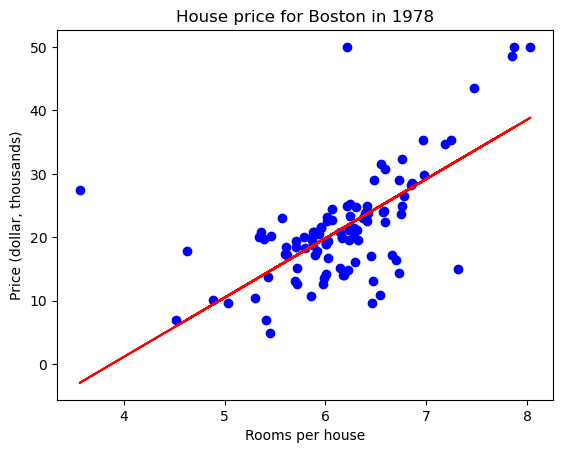

In [98]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("House price for Boston in 1978")
plt.xlabel("Rooms per house")
plt.ylabel("Price (dollar, thousands)")
plt.show()

In [269]:
# accuracy?
model.score(X, y) 

0.48448244178977584

In [ ]:
# R-squared
r2_score(y_test, model.predict(X_test))

## Multiple variables for Linear Regression

In [276]:
# CRIM = crime rate; LSTAT = working class; NOX = air quality; PTRATIO = pupil:teacher ratio; DIS = distance to employment centres; RAD = radial road proximity; RM = rooms
X = df[['ZN', 'TAX', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM']]
print(X.shape)
print(X[:3])

(506, 9)
     ZN  TAX     CRIM     DIS  LSTAT    NOX  PTRATIO  RAD     RM
0  18.0  296  0.00632  4.0900   4.98  0.538     15.3    1  6.575
1   0.0  242  0.02731  4.9671   9.14  0.469     17.8    2  6.421
2   0.0  242  0.02729  4.9671   4.03  0.469     17.8    2  7.185


In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (404, 9), X_test shape: (102, 9), y_train shape: (404,), y_test shape (102,)


In [278]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [279]:
y_pred = model.predict(X_test).reshape(-1,1)
y_pred.shape

(102, 1)

In [280]:
print(model.coef_)
print(model.intercept_)

[0.0474 -0.0136 -0.1264 -1.5799 -0.5593 -17.2764 -0.9347 0.2971 3.6905]
41.85951887619595


In [285]:
# R squared
r2 = r2_score(y_test, model.predict(X_test))
print(r2)

0.710787123424206


In [290]:
# adjust R-squared
print(f"{X.shape[1]} features")
1 - (1-r2) * (len(y)-1) / (len(y)-X.shape[1] -1)

9 features


0.7055393091315001

In [286]:
# Accuracy?
print(model.score(X, y))

0.732129058069559


# Diabetes data

In [111]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [172]:
df.Insulin.nunique()
# all numerical, no categorical variables except for target "Outcome"

186

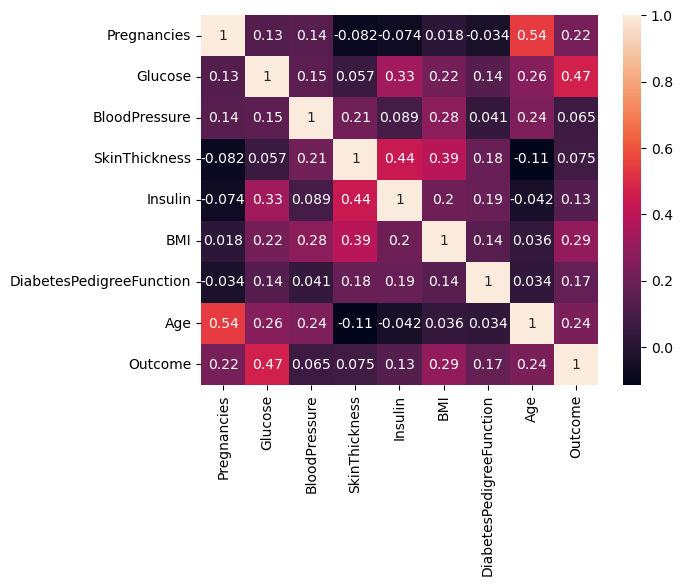

In [112]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
df.isnull().values.any()

False

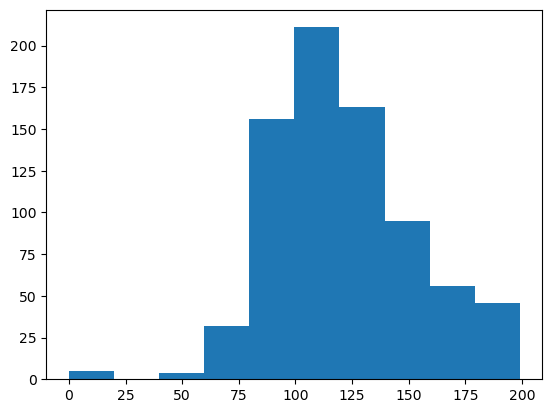

In [171]:
plt.hist(df.Glucose)
plt.show()

In [115]:
X = df.drop('Outcome', axis=1)
y = np.array(df.Outcome)
y = df.Outcome
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 8)
<class 'pandas.core.series.Series'>
(768,)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(614, 8)


In [117]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(type(X_train_scaled))
print(X_train_scaled[0])

<class 'numpy.ndarray'>
[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
 -0.49073479 -1.03594038]


In [118]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[0])

[ 0.68185612 -0.71402038 -0.61712658  0.81710976  0.93474906  0.26073561
 -0.11637247  0.87809089]


In [119]:
print(type(y_train))
print(y_train[:5])

<class 'pandas.core.series.Series'>
60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64


## Logistic Regression

In [214]:
# data refresh data, split, scale (if required)
df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1).to_numpy()
y = df.Outcome.to_numpy() #.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [243]:
model = LogisticRegression(C=0.01, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [244]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [245]:
log_loss(y_test, y_pred)

9.596037590609113

In [246]:
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [20, 35]])

In [247]:
print("%.4f" % accuracy_score(y_train, model.predict(X_train)))
print("%.4f" % accuracy_score(y_test, model.predict(X_test)))

0.7704
0.7338


In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



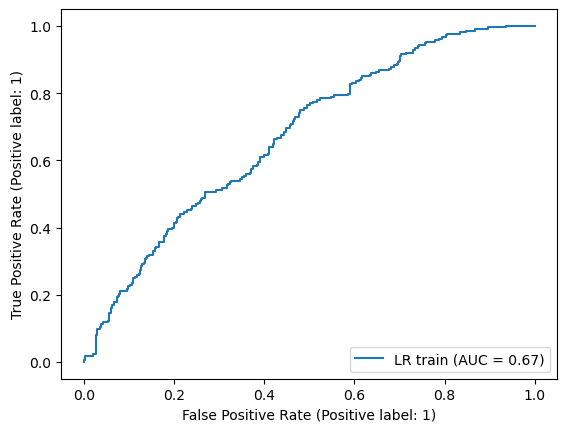

In [221]:
RocCurveDisplay.from_predictions(y_train, model.predict_proba(X_train_scaled)[:,1], name="LR train")  
plt.show()  

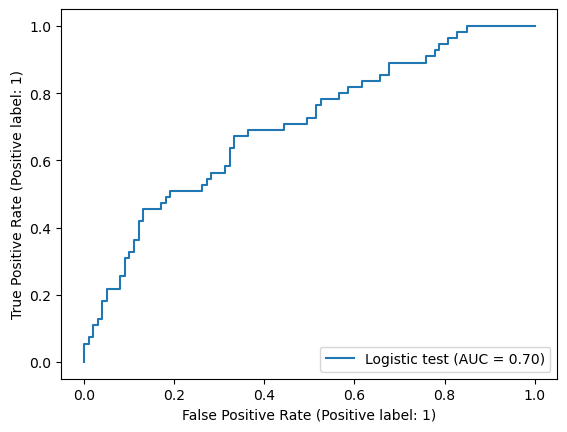

In [222]:
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test_scaled)[:,1], name="Logistic test")  
plt.show()  

In [236]:
model2 = LogisticRegression(C=0.1, penalty="l1", solver="saga", max_iter=2000)
model2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [237]:
y_pred = model2.predict(X_test)

In [238]:
log_loss(y_test, y_pred)

9.59603759060911

In [239]:
confusion_matrix(y_test, y_pred)

array([[91,  8],
       [33, 22]])

In [240]:
print("%.4f" % accuracy_score(y_train, model2.predict(X_train)))
print("%.4f" % accuracy_score(y_test, model2.predict(X_test)))

0.6710
0.7338


In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        99
           1       0.73      0.40      0.52        55

    accuracy                           0.73       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154



## Decision Tree Classifier

In [ ]:
# scaling not needed for decision tree

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_prob = model.predict_proba(X_test)[:, 1]
print(type(y_prob))

<class 'numpy.ndarray'>


In [40]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.7525252525252525


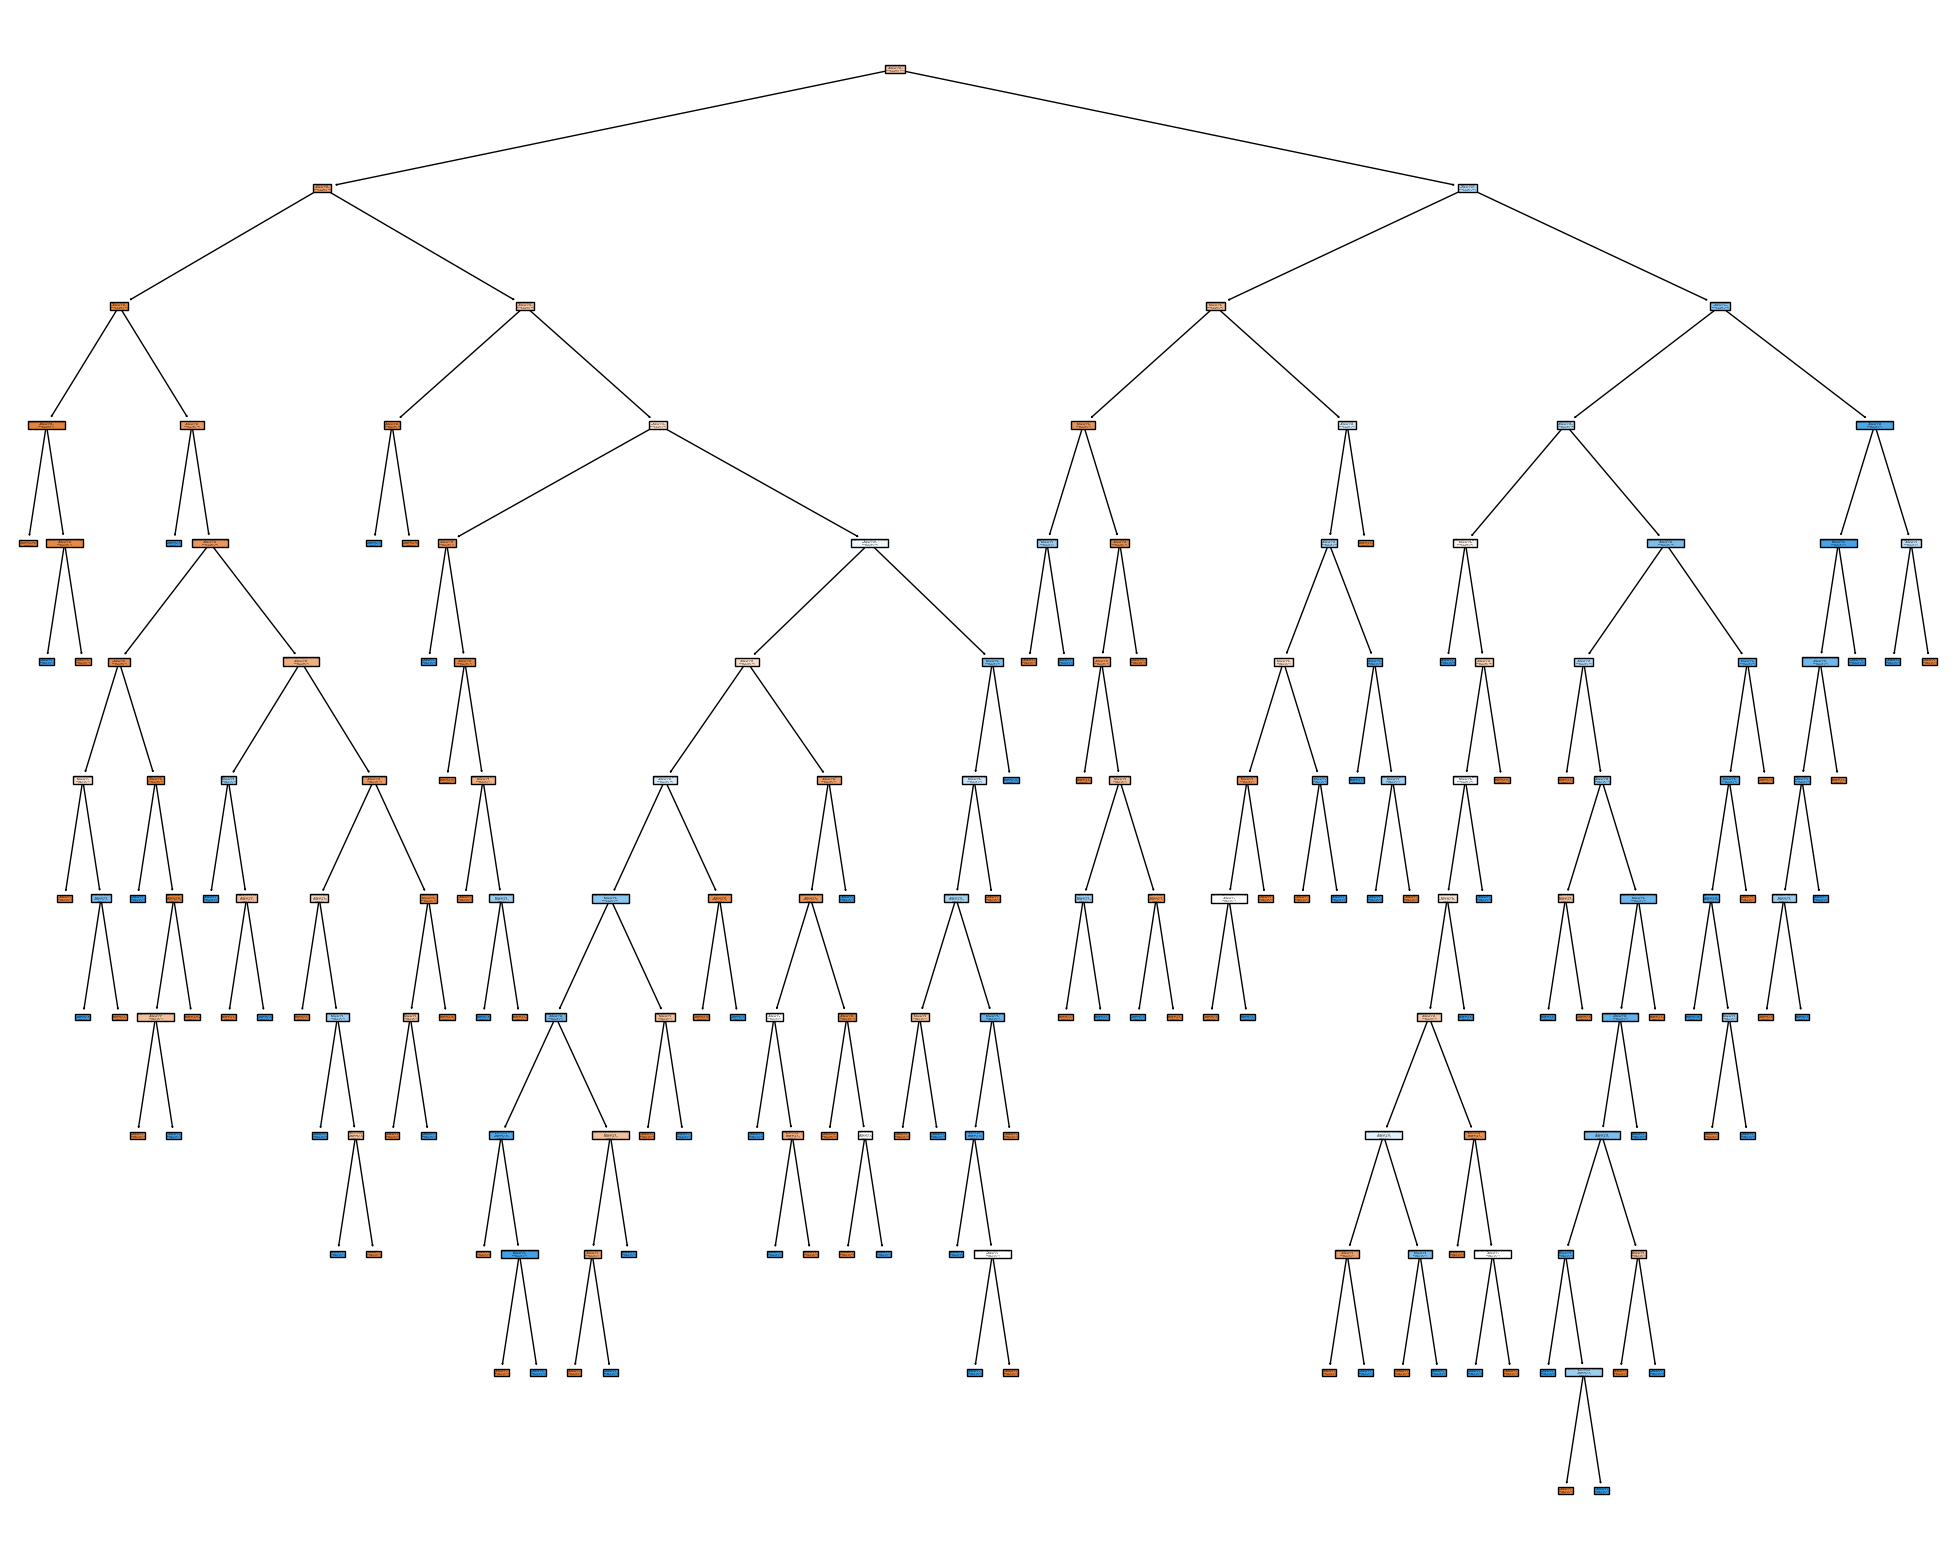

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [56]:
model.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [55]:
model.feature_importances_

array([0.06586823, 0.30510407, 0.12827386, 0.06359799, 0.05230459,
       0.17332081, 0.11010322, 0.10142724])

<Axes: >

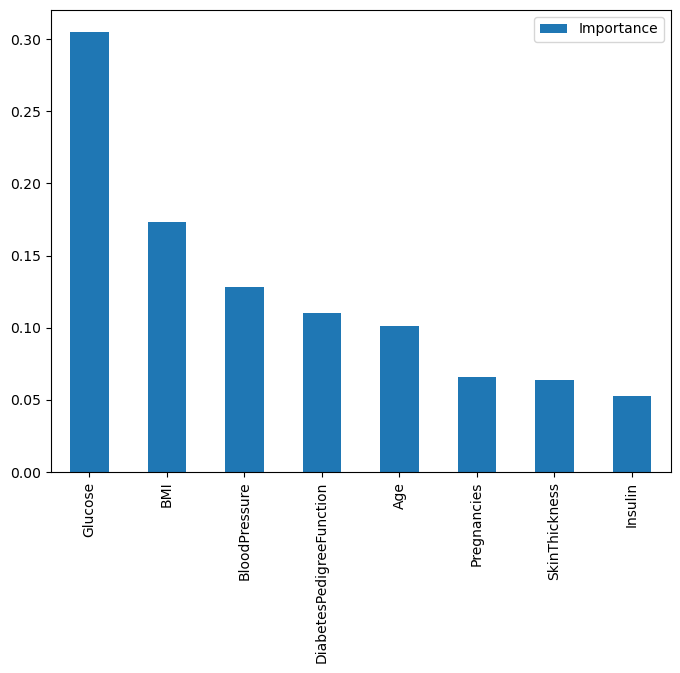

In [54]:
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [46]:
model2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [47]:
y_prob = model2.predict_proba(X_test)[:, 1]
print(type(y_prob))

<class 'numpy.ndarray'>


In [48]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.7711662075298439


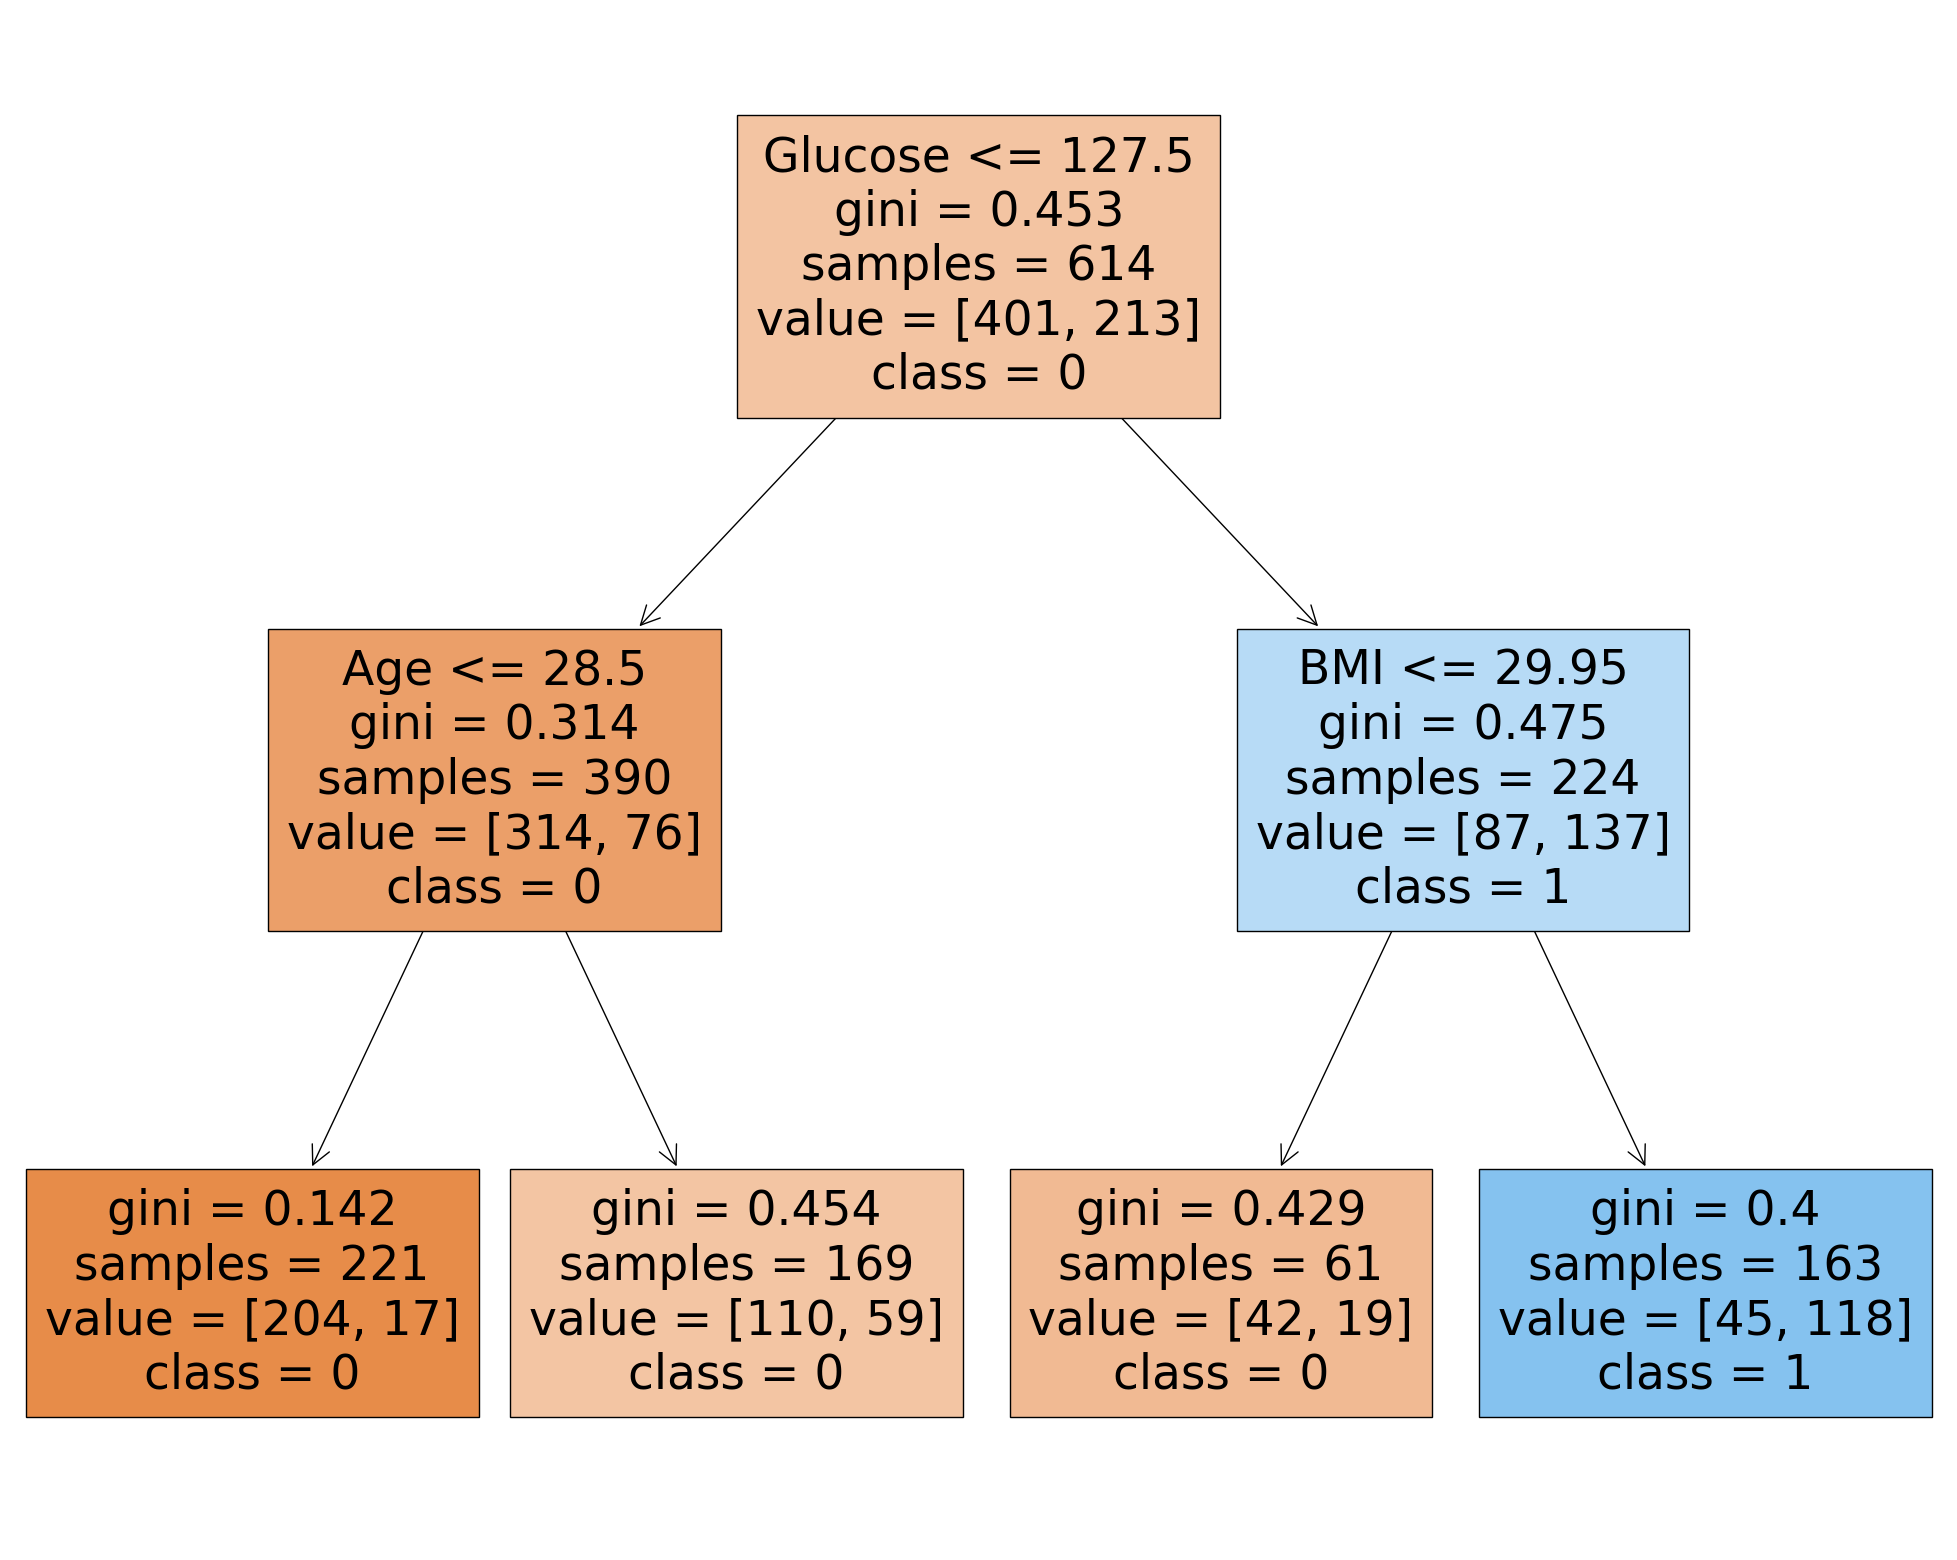

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [50]:
model2.feature_importances_

array([0.        , 0.62785055, 0.        , 0.        , 0.        ,
       0.19186927, 0.        , 0.18028018])

<Axes: >

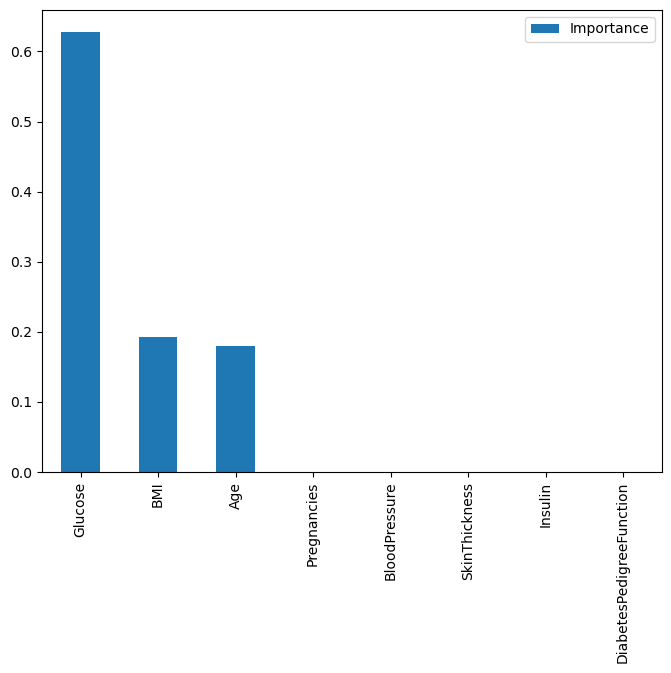

In [53]:
importances = pd.DataFrame(model2.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

## Support Vector Classifier

In [ ]:
# some SVM kernels (notably rbf) require X scaling

In [251]:
# refresh data, split, scale, if required
df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [253]:
y_decision = model.decision_function(X_test_scaled)
y_decision

array([-0.5237, -1.5803, -1.2320, -0.8527, -0.1319, -0.0469, -1.7002,
       0.0295, 0.6674, 0.5104, -0.8725, 0.5990, -0.5840, 0.0276, -1.6045,
       -0.3403, -1.4917, -1.6538, 0.7008, 0.0030, -0.5341, -1.6204,
       -0.2259, -1.6770, 0.0632, 1.3786, -1.1754, -1.6818, -1.3891,
       -1.1356, 0.6699, 0.9317, 1.0999, 1.1855, 0.4770, 0.9541, -0.1165,
       -0.2783, -1.2577, 0.9111, -1.5151, -0.0208, 0.1379, -0.7482,
       -1.7585, 0.2566, 0.2146, -1.1887, -1.0173, 0.7065, -1.5758, 0.6580,
       1.0486, -0.7398, -1.3404, -1.7239, 0.5325, -1.0289, -0.4241,
       1.5885, 0.7876, -0.7110, -0.1585, -0.2222, -1.7493, 0.1850,
       -1.5937, 0.0301, -1.7110, -0.4193, 0.7972, -1.7866, -1.4966,
       -1.7657, -1.2042, -0.3532, -0.6701, -1.1813, -1.2761, -1.2405,
       1.1023, -1.2551, -1.4651, -0.3513, -0.8048, 1.9318, 0.6173,
       -0.4548, -1.4611, -1.4615, -1.6480, -1.1226, -0.9751, -0.2909,
       -0.1391, 0.4891, -0.0414, -1.4543, -0.5130, -1.4243, 1.0520,
       -1.8761, -0.3001, 0

In [254]:
# returns class labels, discrete category
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [255]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_prob

array([0.3162, 0.0808, 0.1319, 0.2161, 0.4612, 0.4945, 0.0678, 0.5245,
       0.7504, 0.7014, 0.2109, 0.7297, 0.2961, 0.5237, 0.0780, 0.3826,
       0.0917, 0.0726, 0.7601, 0.5141, 0.3127, 0.0762, 0.4249, 0.0702,
       0.5377, 0.9020, 0.1424, 0.0697, 0.1061, 0.1502, 0.7511, 0.8200,
       0.8559, 0.8717, 0.6902, 0.8251, 0.4672, 0.4052, 0.1273, 0.8152,
       0.0887, 0.5000, 0.5669, 0.2452, 0.0623, 0.6132, 0.5968, 0.1399,
       0.1755, 0.7617, 0.0813, 0.7476, 0.8456, 0.2477, 0.1136, 0.0655,
       0.7086, 0.1729, 0.3532, 0.9276, 0.7841, 0.2562, 0.4508, 0.4264,
       0.0631, 0.5853, 0.0792, 0.5247, 0.0668, 0.3548, 0.7866, 0.0597,
       0.0911, 0.0616, 0.1370, 0.3780, 0.2687, 0.1413, 0.1241, 0.1304,
       0.8563, 0.1278, 0.0953, 0.3786, 0.2292, 0.9564, 0.7353, 0.3429,
       0.0958, 0.0958, 0.0732, 0.1528, 0.1853, 0.4006, 0.4584, 0.6943,
       0.5000, 0.0967, 0.3199, 0.1009, 0.8463, 0.0545, 0.3972, 0.5143,
       0.8612, 0.1452, 0.2627, 0.8764, 0.1739, 0.7952, 0.0951, 0.3218,
      

In [256]:
roc_auc_score(y_test, y_prob)

0.8049586776859504

In [257]:
accuracy_score(y_test, y_pred)

0.7337662337662337

In [260]:
# what's the difference between X_test, y_test
# SVC.score (ratio of correctly predicted instances) 
# and metrics.accuracy_score (generic)
model.score(X_test, y_test)

/home/jpm/miniconda3/envs/io-ds/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6428571428571429

In [258]:
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [24, 31]])

In [162]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
            c='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='Test set')

# Other datasets initially considered

In [ ]:
df = pd.read_csv("abalone.csv")
print(df.head(2))
df.info()

In [ ]:
df = pd.read_csv("insurance.csv")
print(df.head(5))
df.info()

In [ ]:
df = pd.read_csv("winequality-red.csv")
print(df.head(5))
print(df.info())

In [ ]:
df = pd.read_csv("minimum-temperatures-melbourne.csv")
print(df.head(5))
df.info()

# Iris data for Logistic regression

In [ ]:
df = pd.read_csv("../datasets/iris/Iris.csv")
df.info()

In [ ]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace=True)

In [ ]:
Rooms per house
y = df.Species
print(y.shape)

In [ ]:
X = df.drop('Species', axis=1)
print(X.shape)

In [ ]:
# too few data to split as train and test

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
model = LogisticRegression()
model.fit(X_scaled, y)

In [ ]:
print(y.value_counts())

In [ ]:
y_pred = model.predict(X_scaled)
print(y_pred.shape)

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
print("%.2f" % accuracy_score(y, y_pred))

In [ ]:
confusion_matrix(y, y_pred)

In [ ]:
# too good, will try splitting train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape: {}, X_test shape: {}, y_train shape: {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# use the scaling generated by Training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_test_prob = model.predict_proba(X_test_scaled)
print(y_test_prob.shape)

In [ ]:
print("%.4f" % log_loss(y_test, y_test_prob))

In [ ]:
y_test_pred = model.predict(X_test_scaled)

In [ ]:
y_test_pred

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
# inputs can differ in type i.e. one a np.array, other a Series
print("%.4f" % accuracy_score(y_test, y_test_pred))

In [ ]:
confusion_matrix(y_test, y_test_pred)